## Libraries and data

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from sklearn.datasets import fetch_20newsgroups


In [25]:
# info about dataset
print(fetch_20newsgroups().DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [42]:
# Prepare data
from sklearn.model_selection import train_test_split as tts

corpus = fetch_20newsgroups()
categories = fetch_20newsgroups()["target_names"]
train_set = fetch_20newsgroups(subset = 'train', categories = categories)
test_set = fetch_20newsgroups(subset = 'test', categories = categories)

X_train = train_set.data
y_train = train_set.target

X_test = test_set.data
y_test = test_set.target


sample = 32

# show sample of train_set
print("LABEL: {}".format(categories[y_train[sample]]))
print(X_train[sample])

LABEL: sci.electronics
From: xandor@unixg.ubc.ca (John Gilbert )
Subject: Re: Exploding TV!
Organization: The University of British Columbia
Lines: 4
Distribution: usa
NNTP-Posting-Host: unixg.ubc.ca

 Just as a not of possible interest on this subject ..
It is my understanding that exploding televisions were a major cause of
domestic accidents in the Soviet Union in past years!
  



### Load data for Naive Bayes

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
# returs weight of words (?) need to check in docs
# i.e word from has really low weight cause it is in every article
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

text_clf = Pipeline(
    [
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', MultinomialNB())
    ]
)

text_clf = text_clf.fit(X_train, y_train)

## Predict output + confussion matrix

Text(350.553125, 0.5, 'predicted label')

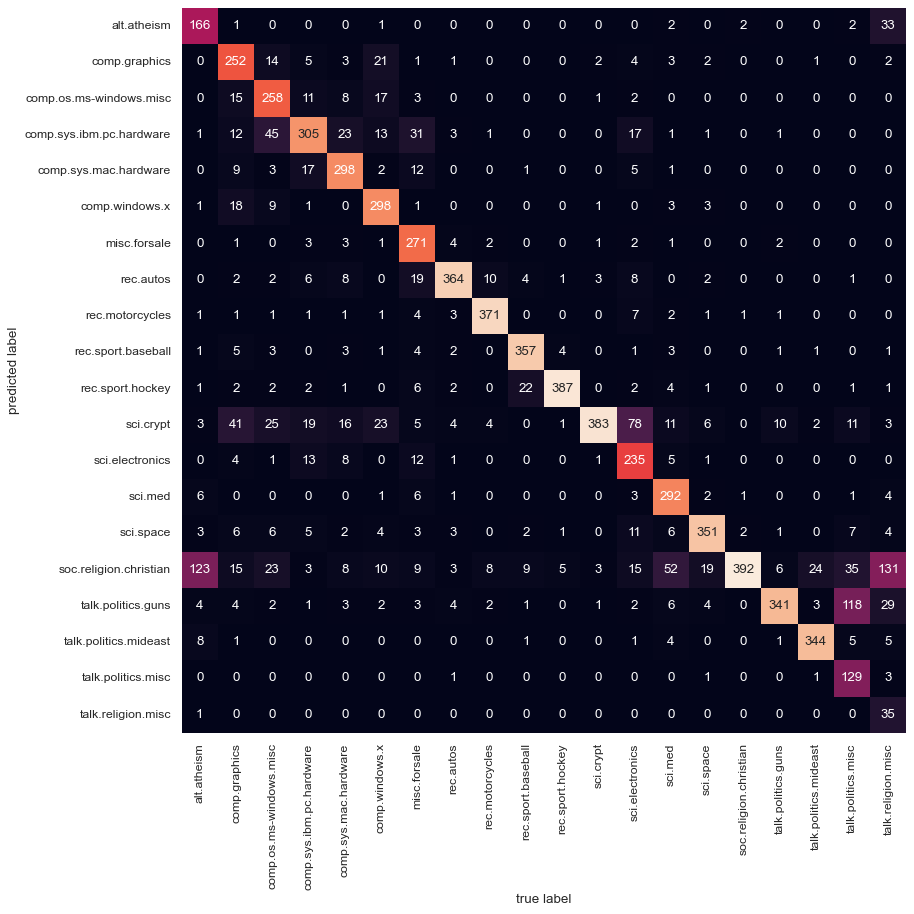

In [52]:
y_pred = text_clf.predict(X_test)
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

figure(figsize=(18, 12), dpi=80)
x_axis_labels = categories

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square = True, annot=True, fmt = 'd', cbar = False, xticklabels = x_axis_labels, yticklabels=x_axis_labels)
plt.xlabel('true label')
plt.ylabel('predicted label')



## Metrics for Naive Bayes

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
naive_bayes_accuracy = accuracy_score(y_test, y_pred)
naive_bayes_f1_score = f1_score(y_test, y_pred, average='weighted')
print("Results for Naive Bayes classifier:")
print("Accuracy: {0:.3f}".format(naive_bayes_accuracy))
print("Weighted f1 score: {0:.3f}".format(naive_bayes_f1_score))

Results for Naive Bayes classifier:
Accuracy: 0.774
Weighted f1 score: 0.768
